In [1]:
# Import Libraries 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [3]:
mydata = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Indian_Startup_Investment_Trends.csv')
df = pd.DataFrame(mydata)

In [4]:
# Imported Data Insights 
print("===================================# VIEWING AND INSPECTING DATA =================================== \n")
print("---------- # FIRST 5 ROWS # -----------\n",df.head())
print("---------- #  LAST 5 ROWS# # -----------\n",df.tail())
print("---------- #  SUMMARY OF THE DATAFRAME# # -----------\n",df.info())
print("---------- #  STATISTICS OF NUMERICAL COLUMNS# # -----------\n",df.describe())
print("---------- #  SHAPE OF THE DATAFRAME# # -----------\n",df.shape)
print("---------- #  LIST OF COLUMN NAMES# # -----------\n",df.columns)
print("---------- #  DATA TYPES OF COLUMNS# # -----------\n",df.dtypes)
print("---------- #  RANDOM 5 ROWS# # -----------\n",df.sample(5))

===================================# VIEWING AND INSPECTING DATA =================================== 

---------- # FIRST 5 ROWS # -----------
   Startup_ID       Name      Sector Sub-Sector       City        State  \
0   a713cd4f  Startup_0      Retail      Sub_2       Pune  Maharashtra   
1   b75f6987  Startup_1      EdTech      Sub_2       Pune    Karnataka   
2   d5ba7ec2  Startup_2    AgriTech      Sub_7    Chennai   Tamil Nadu   
3   5190a643  Startup_3  HealthTech      Sub_8     Mumbai    Telangana   
4   a6801a40  Startup_4  HealthTech      Sub_6  Bangalore  Maharashtra   

   Founded_Year Founder_Name Funding_Stage   Investment_Type  ...  \
0          2022  Founder_356      Series D             Grant  ...   
1          2019   Founder_93           IPO  Convertible Note  ...   
2          2010  Founder_951      Series A             Grant  ...   
3          2007  Founder_538           IPO              Debt  ...   
4          2019   Founder_69          Seed             Grant  ... 

In [5]:
# Data Handling
print("---------- #  NULL VALUE INFO # -----------\n",df.isnull().sum())


print("===================================# DATA HANDLING # =================================== \n")
print("---------- # ENCODING DATA # -----------\n")
object_columns = df.select_dtypes(include=['object']).columns
print(f"\n Data for these Columns to be Encoded:\n {object_columns}")


---------- #  NULL VALUE INFO # -----------
 Startup_ID                    0
Name                          0
Sector                        0
Sub-Sector                    0
City                          0
State                         0
Founded_Year                  0
Founder_Name                  0
Funding_Stage                 0
Investment_Type               0
Amount_Raised                 0
Investors_Count               0
Lead_Investor                 0
Co-Investors                  0
Valuation_Post_Funding        0
Revenue                       0
Profitability                 0
Number_of_Employees           0
Tech_Stack                    0
Primary_Product               0
Customer_Base_Size            0
Growth_Rate                   0
Exit_Status                   0
Acquisition_Details       10027
Funding_Date                  0
Pitch_Deck_Link               0
Social_Media_Followers        0
Competitors                   0
Patents                       0
ESG_Score                  

In [6]:
encoder = LabelEncoder()
for columns in object_columns:
    df[columns] =encoder.fit_transform(df[columns])
    print(f"{columns} is ENCODED >>>>")

print("Data is saved to a new CSV File")
encoded_file = "Indian_Startup_Investment_Trends_encoded.csv"
df.to_csv(encoded_file, index=False)
print(f"\nEncoded data saved to: {encoded_file}")
print(f"A Sample of the Encoded Data:\n{df.head()}")

Startup_ID is ENCODED >>>>
Name is ENCODED >>>>
Sector is ENCODED >>>>
Sub-Sector is ENCODED >>>>
City is ENCODED >>>>
State is ENCODED >>>>
Founder_Name is ENCODED >>>>
Funding_Stage is ENCODED >>>>
Investment_Type is ENCODED >>>>
Lead_Investor is ENCODED >>>>
Co-Investors is ENCODED >>>>
Profitability is ENCODED >>>>
Tech_Stack is ENCODED >>>>
Primary_Product is ENCODED >>>>
Exit_Status is ENCODED >>>>
Acquisition_Details is ENCODED >>>>
Funding_Date is ENCODED >>>>
Pitch_Deck_Link is ENCODED >>>>
Competitors is ENCODED >>>>
Data is saved to a new CSV File

Encoded data saved to: Indian_Startup_Investment_Trends_encoded.csv
A Sample of the Encoded Data:
   Startup_ID  Name  Sector  Sub-Sector  City  State  Founded_Year  \
0        8111     0       5           2     5      2          2022   
1        8867     1       1           2     5      1          2019   
2       10381  3540       0           7     1      3          2010   
3        3975  4651       4           8     4      4    


===================================# VISUALIZATIONS # ===================================


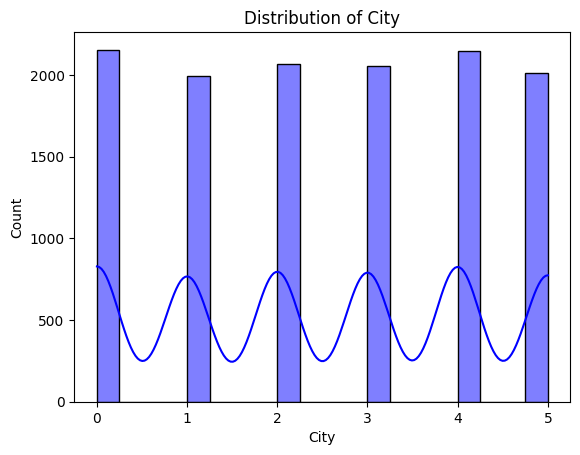

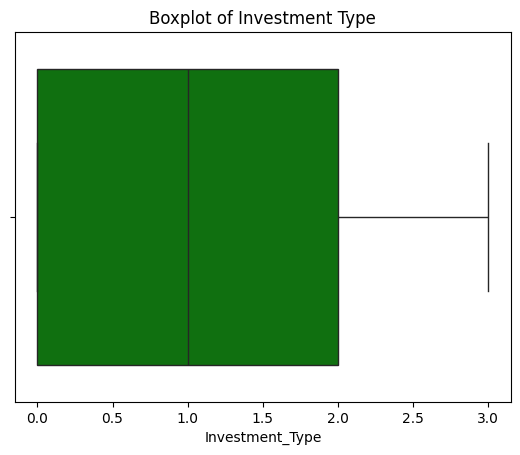

C:\Users\dell\AppData\Local\Temp\ipykernel_23188\3047755536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Investors_Count'], palette='viridis')


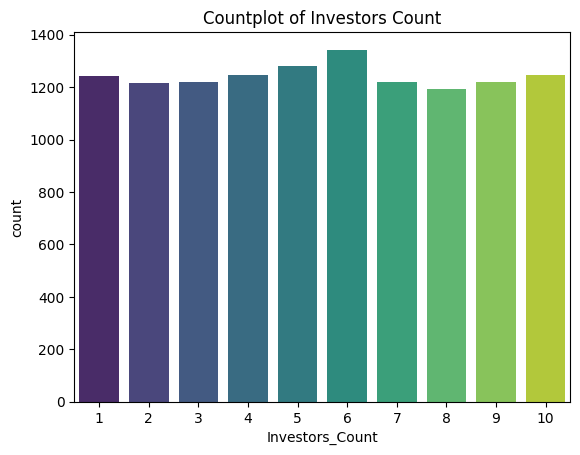

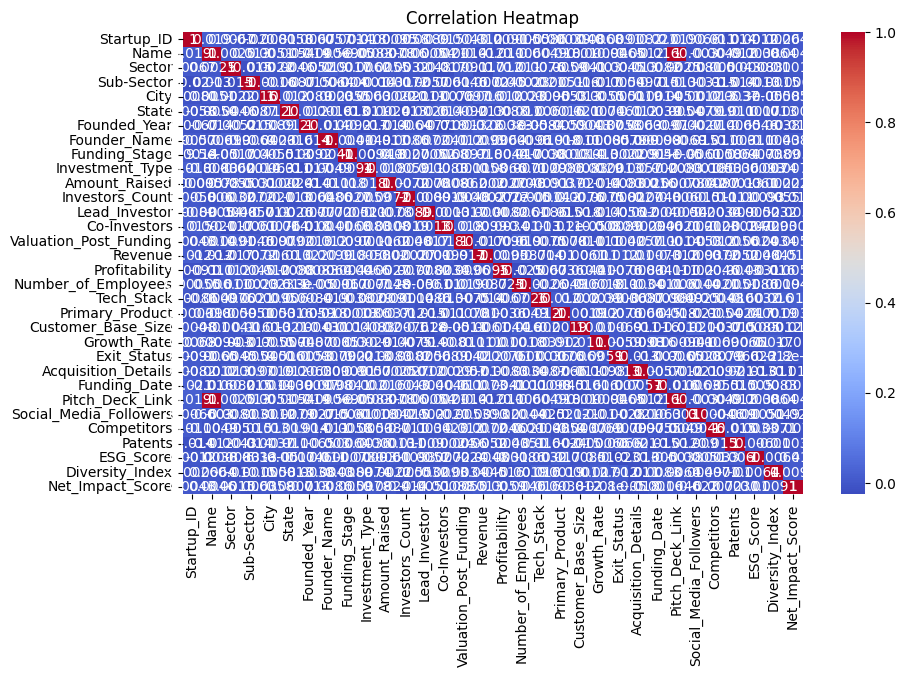

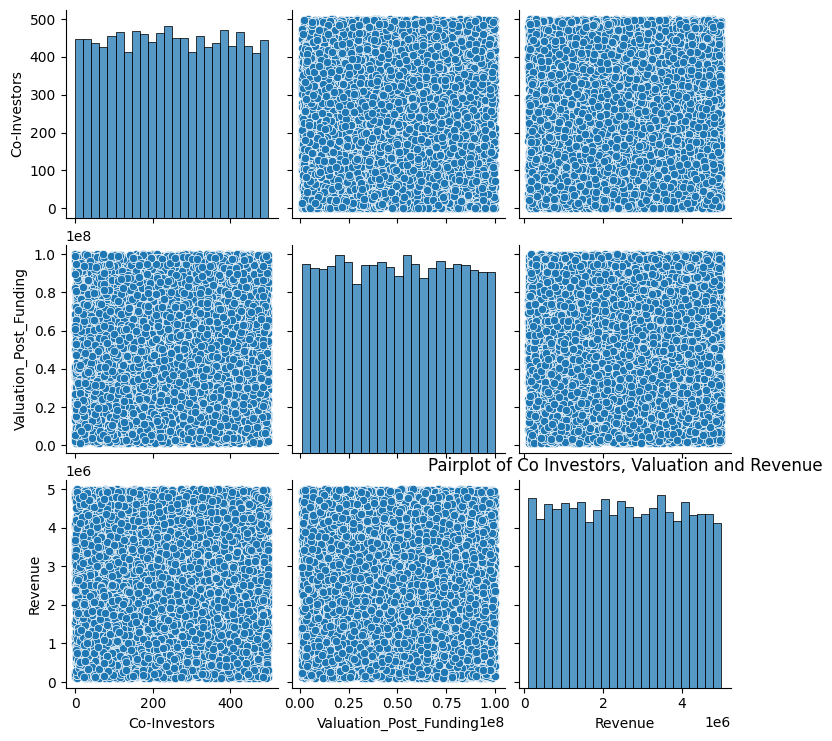

C:\Users\dell\AppData\Local\Temp\ipykernel_23188\3047755536.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer_Base_Size', y='Growth_Rate', data=df, ci=None, palette='mako')
C:\Users\dell\AppData\Local\Temp\ipykernel_23188\3047755536.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Base_Size', y='Growth_Rate', data=df, ci=None, palette='mako')


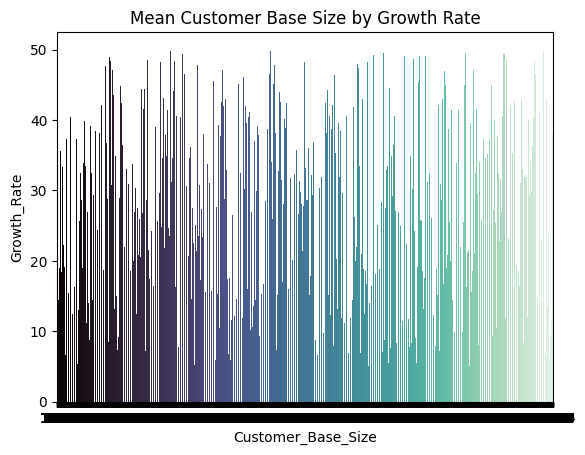

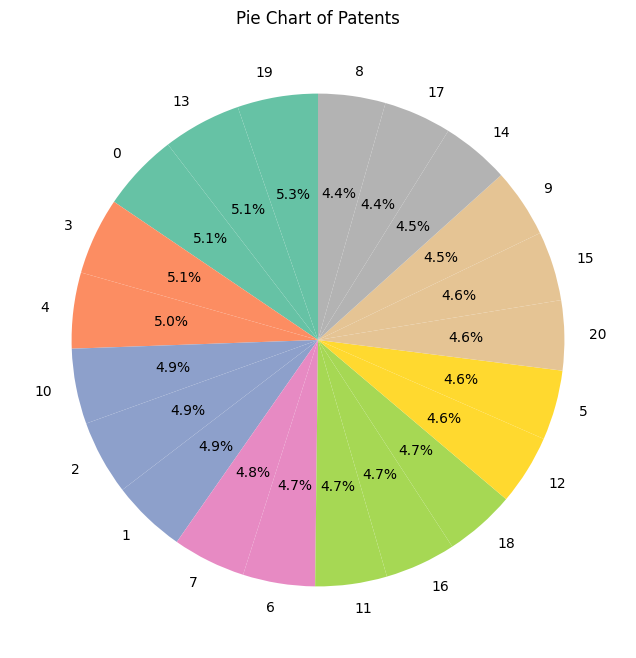

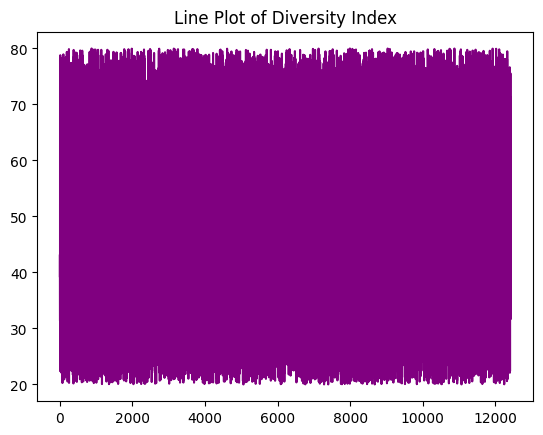

Visualizations completed.


In [7]:
# Visualization
print("\n===================================# VISUALIZATIONS # ===================================")

# 1. Distribution of a City column 
sns.histplot(df['City'], kde=True, color='blue')
plt.title('Distribution of City')
plt.show()

# 2. Boxplot of a Investment Type
sns.boxplot(x=df['Investment_Type'], color='green')
plt.title('Boxplot of Investment Type')
plt.show()

# 3. Countplot for a categorical column (replace 'Column2')
sns.countplot(x=df['Investors_Count'], palette='viridis')
plt.title('Countplot of Investors Count')
plt.show()

# 4. Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 5. Pairplot for selected columns
sns.pairplot(df[['Co-Investors', 'Valuation_Post_Funding', 'Revenue']])
plt.title('Pairplot of Co Investors, Valuation and Revenue')
plt.show()

# 6. Barplot of mean values grouped by a categorical column
sns.barplot(x='Customer_Base_Size', y='Growth_Rate', data=df, ci=None, palette='mako')
plt.title('Mean Customer Base Size by Growth Rate')
plt.show()

# 7. Pie chart for categorical data
data = df['Patents'].value_counts()
data.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90, cmap='Set2')
plt.title('Pie Chart of Patents')
plt.ylabel('')
plt.show()

# 8. Line plot of a numerical column over index
plt.plot(df['Diversity_Index'], color='purple')
plt.title('Line Plot of Diversity Index')
plt.show()

# # 9. Violin plot for distribution and probability density
# sns.violinplot(x='Diversity_Index', y='Sector', data=df, palette='muted')
# plt.title('Violin Plot of Diversity Index by Sector')
# plt.show()

# # 10. Scatterplot of Business Sector and Patents
# sns.scatterplot(x='Sector', y='City', hue='Patents', palette='deep', data=df)
# plt.title('Scatterplot of Sector vs City')
# plt.show()

print("Visualizations completed.")

In [8]:
print("\n===================================# ADABOOST CLASSIFIER # ===================================")

features = ['Sector','Founded_Year','Investment_Type','Investors_Count','Lead_Investor','Co-Investors']

X = df[features]
y = df['Profitability']


===================================# ADABOOST CLASSIFIER # ===================================


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost Classifier: {accuracy:.2f}")

Accuracy of AdaBoost Classifier: 0.50
